In [1]:
#!kaggle competitions download -c nyc-taxi-trip-duration
#скачал с кагле файл и открыл, смысл строк в том же, но они тут не очень и работают

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('gtrain.zip', compression='zip', header=0, sep=',', quotechar='"')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df = df.drop('dropoff_datetime', axis=1)

In [5]:
df = df.sort_values(by='pickup_datetime')

In [6]:
train_df, test_df = df[:10 **6], df[10 ** 6:]

In [7]:
len(test_df)

458644

In [8]:
len(train_df)

1000000

<AxesSubplot:>

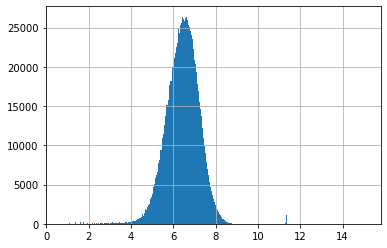

In [9]:
np.log1p(train_df.trip_duration).hist(bins=300)

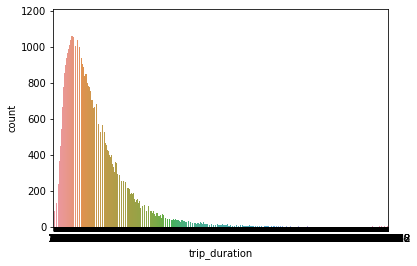

In [10]:
plt.figure()
date_count_plot = sns.countplot(x=train_df.trip_duration)

In [11]:
train_df['log_trip_duration'] = np.log1p(train_df.trip_duration)
test_df['log_trip_duration'] = np.log1p(test_df.trip_duration)


C:\Users\AACE~1\AppData\Local\Temp/ipykernel_11952/623066710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['log_trip_duration'] = np.log1p(train_df.trip_duration)
C:\Users\AACE~1\AppData\Local\Temp/ipykernel_11952/623066710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['log_trip_duration'] = np.log1p(test_df.trip_duration)


In [12]:
train_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,6.745236
223872,id1665586,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,7.166266
713067,id1210365,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,6.013715
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,5.638355
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,6.602588


In [13]:
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)

C:\Games\Code\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
train_df.pickup_datetime

96469     2016-01-01 00:00:17
223872    2016-01-01 00:00:53
713067    2016-01-01 00:01:01
652463    2016-01-01 00:01:14
722901    2016-01-01 00:01:20
                  ...        
1384418   2016-05-04 03:10:19
1100978   2016-05-04 03:11:21
630885    2016-05-04 03:11:36
567651    2016-05-04 03:13:35
777457    2016-05-04 03:14:02
Name: pickup_datetime, Length: 1000000, dtype: datetime64[ns]

In [15]:
train_df.pickup_datetime[0].day

14

In [16]:
date = train_df.pickup_datetime.apply(lambda x: x.date())

In [17]:
date

96469      2016-01-01
223872     2016-01-01
713067     2016-01-01
652463     2016-01-01
722901     2016-01-01
              ...    
1384418    2016-05-04
1100978    2016-05-04
630885     2016-05-04
567651     2016-05-04
777457     2016-05-04
Name: pickup_datetime, Length: 1000000, dtype: object

[Text(0, 0, '2016-01-01'),
 Text(1, 0, '2016-01-02'),
 Text(2, 0, '2016-01-03'),
 Text(3, 0, '2016-01-04'),
 Text(4, 0, '2016-01-05'),
 Text(5, 0, '2016-01-06'),
 Text(6, 0, '2016-01-07'),
 Text(7, 0, '2016-01-08'),
 Text(8, 0, '2016-01-09'),
 Text(9, 0, '2016-01-10'),
 Text(10, 0, '2016-01-11'),
 Text(11, 0, '2016-01-12'),
 Text(12, 0, '2016-01-13'),
 Text(13, 0, '2016-01-14'),
 Text(14, 0, '2016-01-15'),
 Text(15, 0, '2016-01-16'),
 Text(16, 0, '2016-01-17'),
 Text(17, 0, '2016-01-18'),
 Text(18, 0, '2016-01-19'),
 Text(19, 0, '2016-01-20'),
 Text(20, 0, '2016-01-21'),
 Text(21, 0, '2016-01-22'),
 Text(22, 0, '2016-01-23'),
 Text(23, 0, '2016-01-24'),
 Text(24, 0, '2016-01-25'),
 Text(25, 0, '2016-01-26'),
 Text(26, 0, '2016-01-27'),
 Text(27, 0, '2016-01-28'),
 Text(28, 0, '2016-01-29'),
 Text(29, 0, '2016-01-30'),
 Text(30, 0, '2016-01-31'),
 Text(31, 0, '2016-02-01'),
 Text(32, 0, '2016-02-02'),
 Text(33, 0, '2016-02-03'),
 Text(34, 0, '2016-02-04'),
 Text(35, 0, '2016-02-05'),
 T

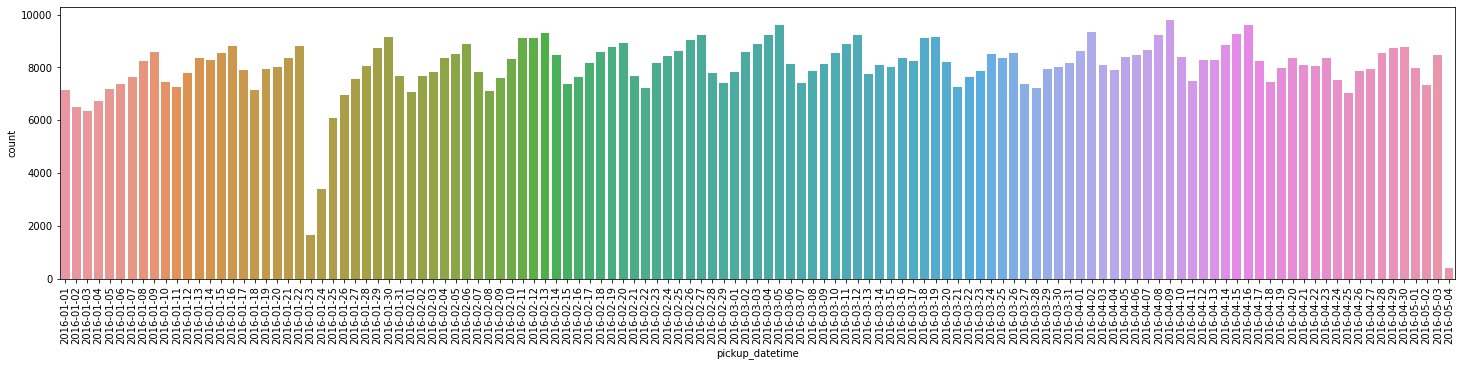

In [18]:
plt.figure(figsize=(25, 5))
date_count_plot = sns.countplot(x=date)
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=90)

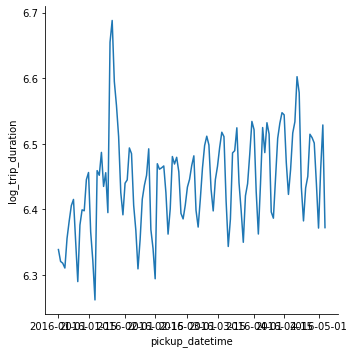

In [19]:
grouped_train = train_df.groupby(by=date)
sns.relplot(data=grouped_train.log_trip_duration.aggregate('mean'), kind='line')

In [20]:
train_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,6.745236
223872,id1665586,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,7.166266
713067,id1210365,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,6.013715
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,5.638355
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,6.602588


In [21]:
train_df.query("'2016-01-23' <= pickup_datetime < '2016-01-25'")
# train_df.set_index('pickup_datetime')['2016-01-23':'2016-01-24'] одинаковый функционал примерно,
# kiska = pd.date_range(start='1/23/2016', end='1/24/2016') создает два штампа времени, но не вышло по ним ориентироваться
#  А с верхним получилось взаимодействовать

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
1113990,id2197713,2,2016-01-23 00:00:03,1,-73.988632,40.749088,-73.987259,40.768440,N,495,6.206576
546086,id1836431,1,2016-01-23 00:00:16,1,-74.004326,40.742359,-73.979446,40.749588,N,1578,7.364547
738896,id1701197,2,2016-01-23 00:00:20,1,-73.957092,40.770256,-73.974060,40.761585,N,504,6.224558
220854,id0682965,1,2016-01-23 00:00:21,2,-74.004860,40.740711,-73.986984,40.721104,N,962,6.870053
822393,id1357784,2,2016-01-23 00:00:24,2,-73.997353,40.719212,-73.987427,40.738743,N,839,6.733402
...,...,...,...,...,...,...,...,...,...,...,...
136854,id0601156,1,2016-01-24 23:57:23,1,-73.953217,40.775810,-73.967766,40.762749,N,357,5.880533
221151,id1748595,2,2016-01-24 23:58:29,5,-73.948738,40.781879,-73.965340,40.759232,N,361,5.891644
612802,id0721230,2,2016-01-24 23:59:12,1,-73.863052,40.769279,-73.796631,40.790138,N,1557,7.351158
757084,id2944054,1,2016-01-24 23:59:37,1,-73.960403,40.761612,-73.921616,40.743359,N,637,6.458338


In [22]:
train_df['anomaly'] = 0
#колонка anomaly где все значения по 0

C:\Users\AACE~1\AppData\Local\Temp/ipykernel_11952/1454534397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['anomaly'] = 0


In [23]:
#train_df.set_index('pickup_datetime')['2016-01-23':'2016-01-24']
k = train_df.query("'2016-01-23' <= pickup_datetime < '2016-01-25'")
k['anomaly'] = 1
testik = pd.concat([k, train_df])
testik

C:\Users\AACE~1\AppData\Local\Temp/ipykernel_11952/2078294047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['anomaly'] = 1


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,anomaly
1113990,id2197713,2,2016-01-23 00:00:03,1,-73.988632,40.749088,-73.987259,40.768440,N,495,6.206576,1
546086,id1836431,1,2016-01-23 00:00:16,1,-74.004326,40.742359,-73.979446,40.749588,N,1578,7.364547,1
738896,id1701197,2,2016-01-23 00:00:20,1,-73.957092,40.770256,-73.974060,40.761585,N,504,6.224558,1
220854,id0682965,1,2016-01-23 00:00:21,2,-74.004860,40.740711,-73.986984,40.721104,N,962,6.870053,1
822393,id1357784,2,2016-01-23 00:00:24,2,-73.997353,40.719212,-73.987427,40.738743,N,839,6.733402,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1384418,id2351670,2,2016-05-04 03:10:19,1,-73.990578,40.757702,-73.920914,40.756573,N,841,6.735780,0
1100978,id0756776,1,2016-05-04 03:11:21,1,-73.994774,40.760296,-73.984291,40.766556,N,137,4.927254,0
630885,id1074885,1,2016-05-04 03:11:36,1,-73.986427,40.741432,-73.895416,40.758724,N,1002,6.910751,0
567651,id1753963,2,2016-05-04 03:13:35,5,-73.994522,40.724815,-73.990700,40.723518,N,189,5.247024,0


In [24]:
testik = testik.drop_duplicates(subset=['pickup_datetime', 'anomaly'], keep='first')

In [25]:
train_df1 = train_df.drop_duplicates(subset=['pickup_datetime'], keep='first')

In [26]:
train_df1
#Проблема в том, что в testik без дубликатов на 5к больше значений

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,anomaly
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,6.745236,0
223872,id1665586,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,7.166266,0
713067,id1210365,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,6.013715,0
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,5.638355,0
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,6.602588,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1384418,id2351670,2,2016-05-04 03:10:19,1,-73.990578,40.757702,-73.920914,40.756573,N,841,6.735780,0
1100978,id0756776,1,2016-05-04 03:11:21,1,-73.994774,40.760296,-73.984291,40.766556,N,137,4.927254,0
630885,id1074885,1,2016-05-04 03:11:36,1,-73.986427,40.741432,-73.895416,40.758724,N,1002,6.910751,0
567651,id1753963,2,2016-05-04 03:13:35,5,-73.994522,40.724815,-73.990700,40.723518,N,189,5.247024,0


In [27]:
train_df1['anomaly'].unique()

array([0], dtype=int64)

In [28]:
testik['anomaly'].value_counts()

0    945571
1      4874
Name: anomaly, dtype: int64

In [29]:
testik.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,anomaly
1113990,id2197713,2,2016-01-23 00:00:03,1,-73.988632,40.749088,-73.987259,40.768440,N,495,6.206576,1
546086,id1836431,1,2016-01-23 00:00:16,1,-74.004326,40.742359,-73.979446,40.749588,N,1578,7.364547,1
738896,id1701197,2,2016-01-23 00:00:20,1,-73.957092,40.770256,-73.974060,40.761585,N,504,6.224558,1
220854,id0682965,1,2016-01-23 00:00:21,2,-74.004860,40.740711,-73.986984,40.721104,N,962,6.870053,1
822393,id1357784,2,2016-01-23 00:00:24,2,-73.997353,40.719212,-73.987427,40.738743,N,839,6.733402,1


In [30]:
def create_features(date_frame):
    X = pd.concat([
        date_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
        date_frame.pickup_datetime.apply(lambda x: x.hour),
        date_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_wday),
        date_frame.anomaly.apply(lambda x: x)
    ], axis=1, keys=['day', 'hour', 'week_day','is_anomaly'])

    return X, date_frame.log_trip_duration

In [31]:
X_train, y_train = create_features(testik) #testik пошел из train_df

In [32]:
y_train

1113990    6.206576
546086     7.364547
738896     6.224558
220854     6.870053
822393     6.733402
             ...   
1384418    6.735780
1100978    4.927254
630885     6.910751
567651     5.247024
777457     5.062595
Name: log_trip_duration, Length: 950445, dtype: float64

In [33]:
X_train

,day,hour,week_day,is_anomaly
1113990,23,0,5,1
546086,23,0,5,1
738896,23,0,5,1
220854,23,0,5,1
822393,23,0,5,1
...,...,...,...,...
1384418,125,3,2,0
1100978,125,3,2,0
630885,125,3,2,0
567651,125,3,2,0


In [34]:
test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)

C:\Games\Code\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
test_df['anomaly'] = 0

C:\Users\AACE~1\AppData\Local\Temp/ipykernel_11952/57021801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['anomaly'] = 0


In [36]:
X_test, y_test = create_features(test_df)

Добавил аномали в треин и тестовую выборку


хуй

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [38]:
X_train, y_train = create_features(testik) #testik пошел из train_df #нужно было переделать ОНЕ под дни недели
# и заново отправить ему набор начальных данных
X_test, y_test = create_features(test_df)

In [39]:
ohe = ColumnTransformer([("One hot", OneHotEncoder(sparse=False),[1, 2])], remainder="passthrough") #[1,2] - столбцы

In [40]:
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [41]:
X_train #У меня получается 32 столбца

array([[  1.,   0.,   0., ...,   0.,  23.,   1.],
       [  1.,   0.,   0., ...,   0.,  23.,   1.],
       [  1.,   0.,   0., ...,   0.,  23.,   1.],
       ...,
       [  0.,   0.,   0., ...,   0., 125.,   0.],
       [  0.,   0.,   0., ...,   0., 125.,   0.],
       [  0.,   0.,   0., ...,   0., 125.,   0.]])

In [42]:
X_test

array([[  0.,   0.,   0., ...,   0., 125.,   0.],
       [  0.,   0.,   0., ...,   0., 125.,   0.],
       [  0.,   0.,   0., ...,   0., 125.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0., 182.,   0.],
       [  0.,   0.,   0., ...,   0., 182.,   0.],
       [  0.,   0.,   0., ...,   0., 182.,   0.]])

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [44]:
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
mean_squared_error(y_test, lin_reg.predict(X_test))

0.6504099548889269

In [47]:
ridge = Ridge(alpha=1000).fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

0.6505349712020131

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_searcher = GridSearchCV(
    Ridge(),
    param_grid={
        'alpha': np.linspace(100, 1000, 10)
        
    }
)

In [50]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])})

In [51]:
grid_searcher.best_params_

{'alpha': 400.0}

In [52]:
mean_squared_error(y_test, grid_searcher.predict(X_test))

0.650441811642067

In [53]:
grid_searcher.best_params_

{'alpha': 400.0}

In [54]:
# 0.6534309800537684  Линейная регрессия
# 0.6535589604358449  Ридж 1к
# 0.653468861912505   Грид ридж 400
# 0.6538703424304909  Грид ридж у чела с курса на 388 до аномали и дней недели

In [55]:
#from sklearn.neighbors import KNeighborsRegressor

In [56]:
#gs = GridSearchCV(
#    KNeighborsRegressor(),
#    param_grid={
#        'n_neighbors': [2, 3, 5, 10],
#        'weights': ['uniform', 'distance'],
#        'p': [1, 2, 3]
#    },
#    cv= 10,
#    n_jobs=2
#) занимает вечность

In [57]:
# gs.fit(X_train, y_train) #включение на вечность

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [78]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test_scaled)

#Был какой-то баг с 3ей строкой с присваиванием функции
#Без обучения (fit) "трансформ" не работает)

In [96]:
clf = Lasso(alpha=2.65e-05)
clf.fit(X_train_scaled, y_train)

C:\Games\Code\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+04, tolerance: 5.881e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.65e-05)

In [105]:
mean_squared_error(y_test, clf.predict(X_test_scaled))

0.6562108624307065

In [ ]:
# 0.6504243430068902 без масштабирования
# 0.6562108624307065 с маштабированием

In [ ]:
len(X_train_scaled)

In [104]:
wtf = clf.coef_